# Plant Disease Prediction

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70443 files belonging to 39 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17598 files belonging to 39 classes.


## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=39,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=25)

Epoch 1/25
2202/2202 [==============================] - 169s 74ms/step - loss: 1.4689 - accuracy: 0.5716 - val_loss: 0.6092 - val_accuracy: 0.8083
Epoch 2/25
2202/2202 [==============================] - 171s 78ms/step - loss: 0.4849 - accuracy: 0.8464 - val_loss: 0.3856 - val_accuracy: 0.8778
Epoch 3/25
2202/2202 [==============================] - 184s 83ms/step - loss: 0.2870 - accuracy: 0.9070 - val_loss: 0.3102 - val_accuracy: 0.8983
Epoch 4/25
2202/2202 [==============================] - 160s 73ms/step - loss: 0.1978 - accuracy: 0.9358 - val_loss: 0.1846 - val_accuracy: 0.9406
Epoch 5/25
2202/2202 [==============================] - 160s 73ms/step - loss: 0.1431 - accuracy: 0.9528 - val_loss: 0.1839 - val_accuracy: 0.9431
Epoch 6/25
2202/2202 [==============================] - 160s 72ms/step - loss: 0.1188 - accuracy: 0.9606 - val_loss: 0.1328 - val_accuracy: 0.9572
Epoch 7/25
2202/2202 [==============================] - 160s 73ms/step - loss: 0.0911 - accuracy: 0.9698 - val_loss: 0

# Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2202/2202 [==============================] - 52s 23ms/step - loss: 0.0213 - accuracy: 0.9936
Training accuracy: 0.9935834407806396


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 12s 22ms/step - loss: 0.1399 - accuracy: 0.9649
Validation accuracy: 0.9649391770362854


## Saving Model

In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'loss': [1.4688963890075684,
  0.48486238718032837,
  0.2870085537433624,
  0.19784486293792725,
  0.1431247740983963,
  0.11882719397544861,
  0.09113959223031998,
  0.0834626778960228,
  0.06583907455205917,
  0.06324499845504761,
  0.054575592279434204,
  0.05018860101699829,
  0.0450180247426033,
  0.0423334538936615,
  0.03671640530228615,
  0.038173459470272064,
  0.03304968774318695,
  0.031192222610116005,
  0.028722437098622322,
  0.03133209049701691,
  0.026793265715241432,
  0.031140713021159172,
  0.025629661977291107,
  0.022933095693588257,
  0.02673434093594551],
 'accuracy': [0.571625292301178,
  0.8464290499687195,
  0.907031238079071,
  0.935820460319519,
  0.9528412818908691,
  0.9605780839920044,
  0.9698337912559509,
  0.9721618890762329,
  0.9788623452186584,
  0.9793307781219482,
  0.9829933643341064,
  0.9838308691978455,
  0.9860028624534607,
  0.9863577485084534,
  0.9879193305969238,
  0.9880896806716919,
  0.9894524812698364,
  0.9901764392852783,
  0.99132

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy Visualization

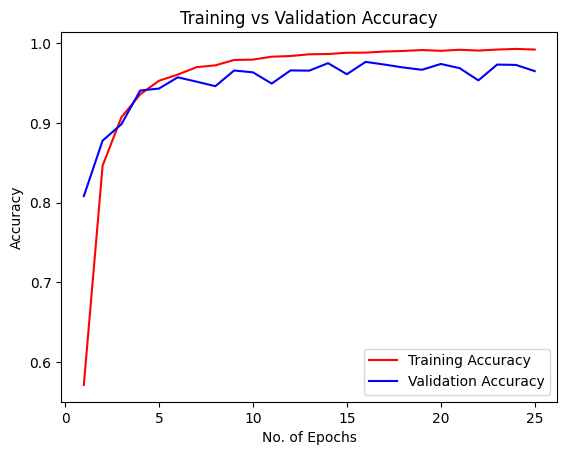

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, len(training_history.history['accuracy']) + 1)

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


# Some other metrics for model evaluation

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17598 files belonging to 39 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17598/17598 [==============================] - 57s 3ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(17598,), dtype=int64, numpy=array([ 0,  0,  0, ..., 38, 38, 38], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(17598,), dtype=int64, numpy=array([ 0,  0,  0, ..., 38, 38, 38], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.97       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.92      0.96       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.94      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.92      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

## Confusion Matrix Visualization

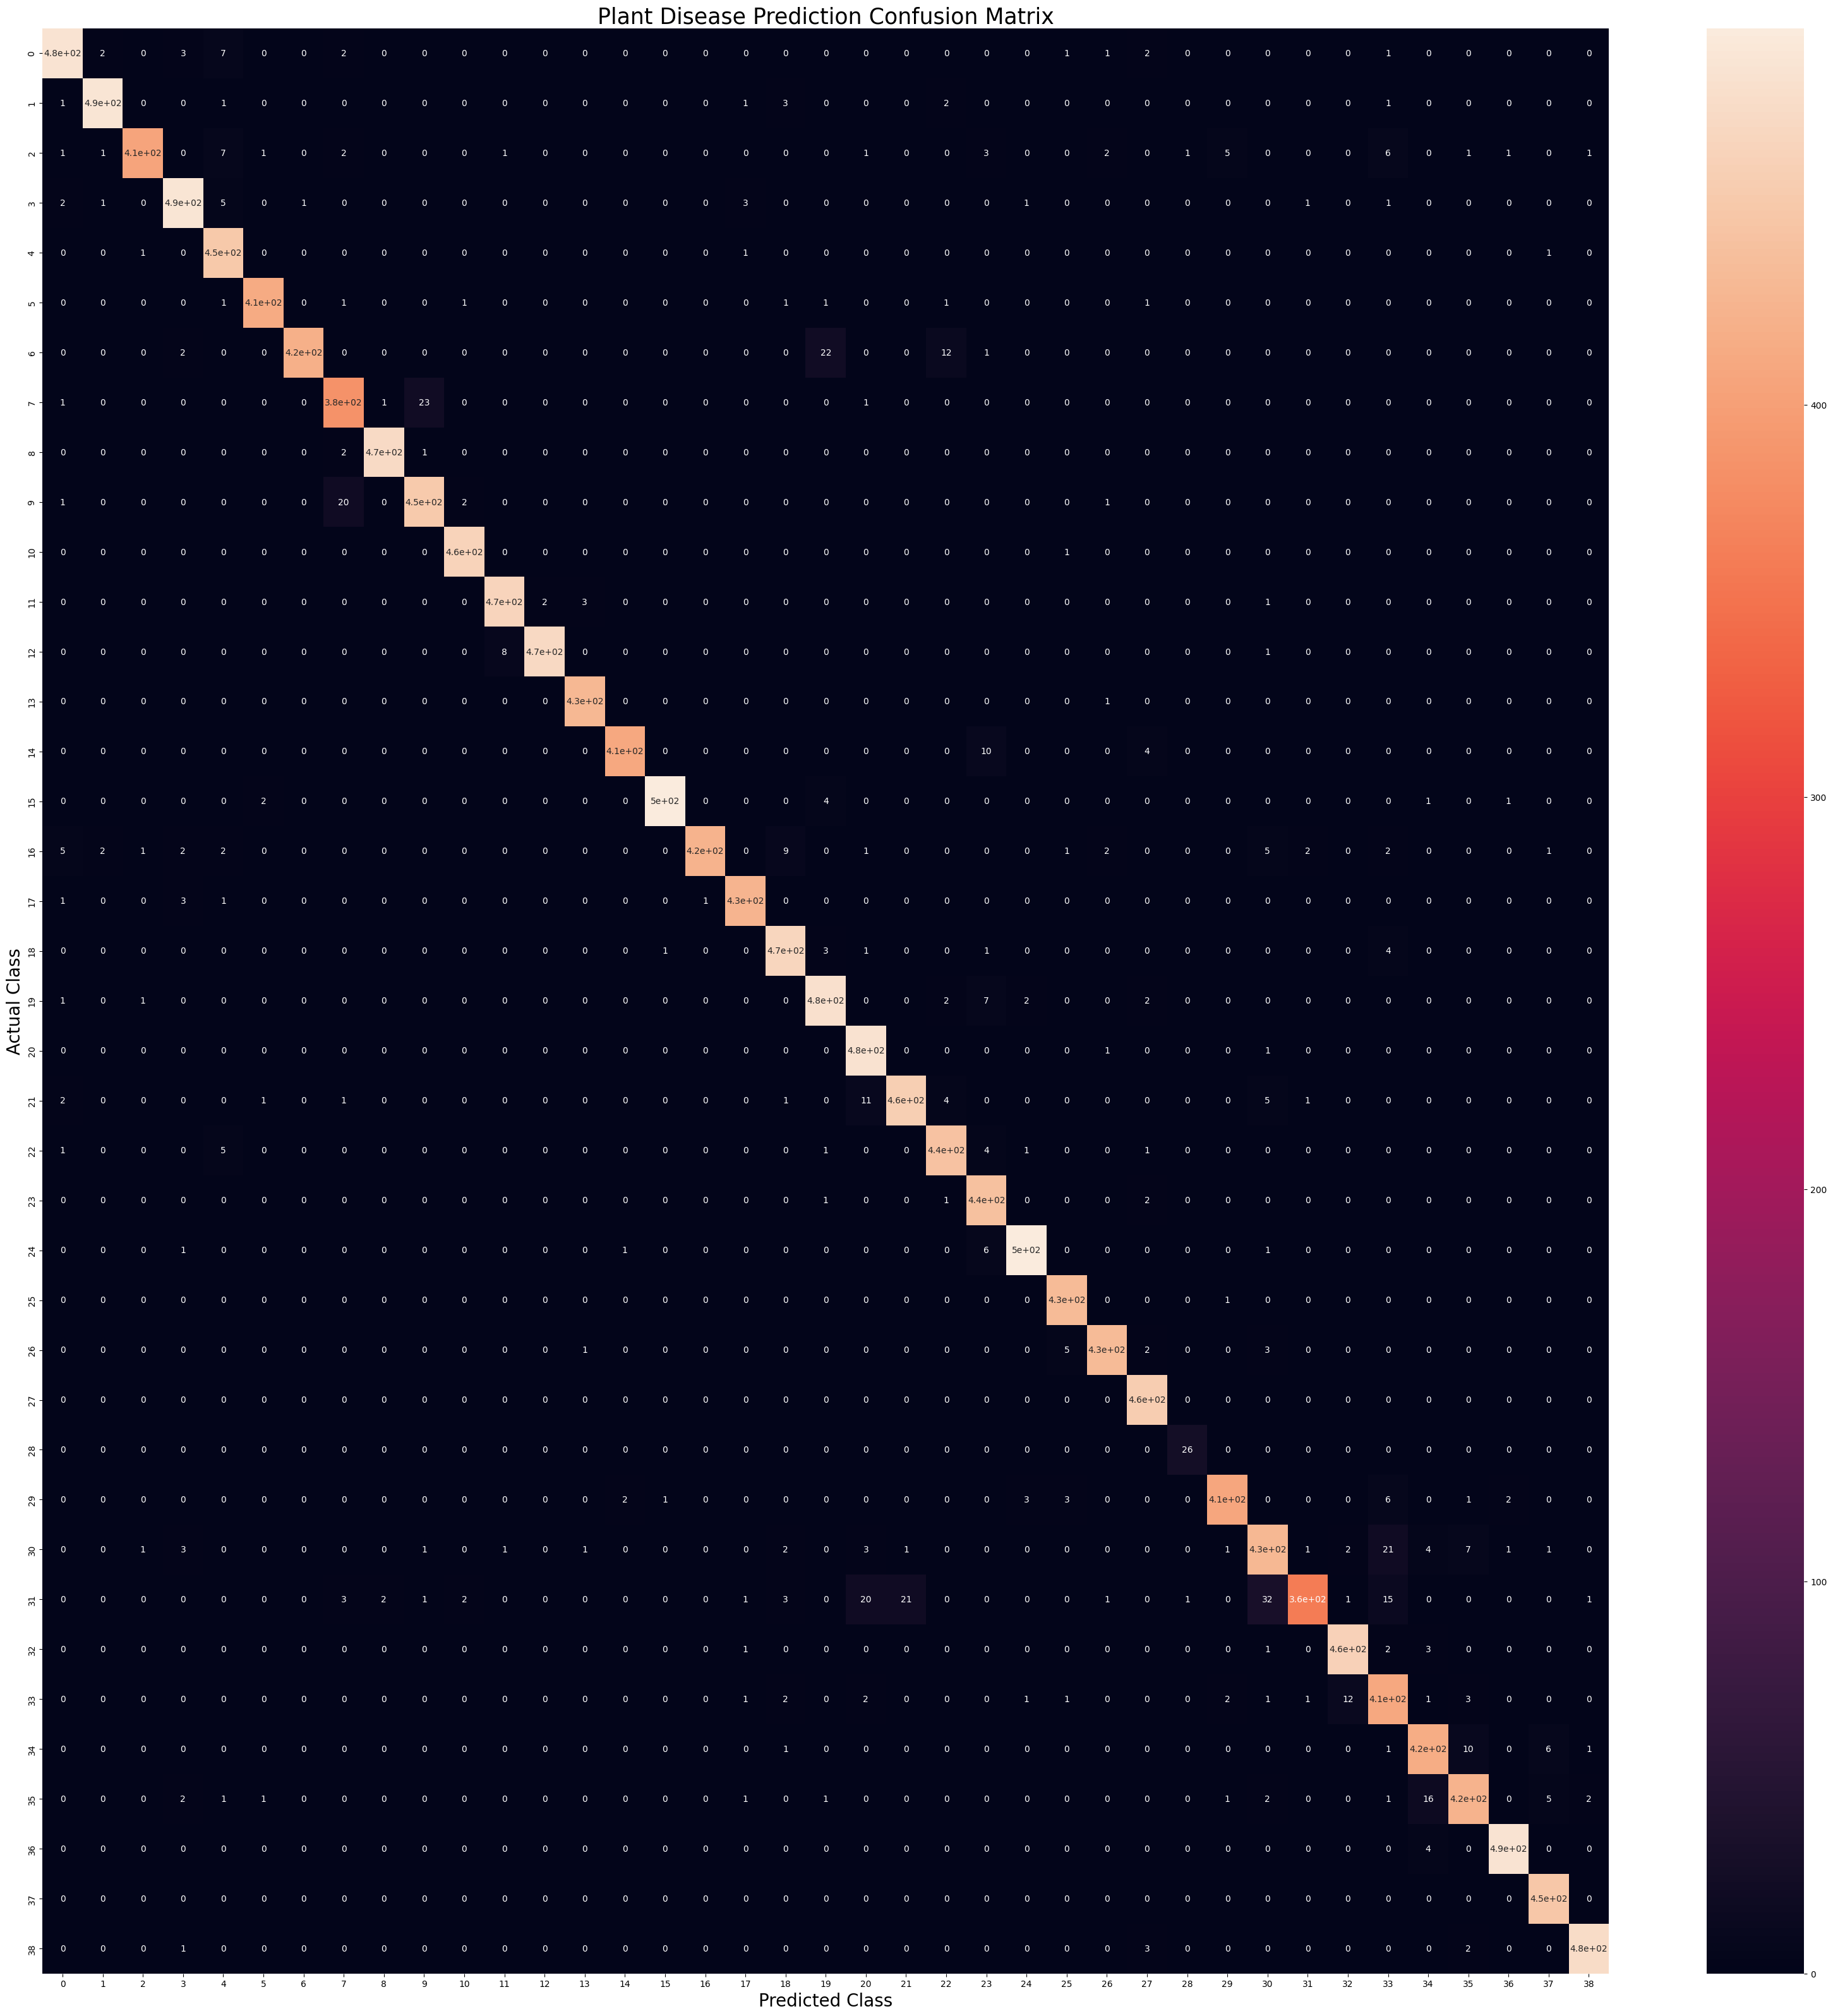

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [34]:
cnn.save('trained_plant_disease_model.h5')